In [144]:
pip install pycairo

Note: you may need to restart the kernel to use updated packages.


In [145]:
pip install cairocffi

Note: you may need to restart the kernel to use updated packages.


In [146]:
import pandas as PD

In [147]:
import numpy as NP

In [148]:
import igraph as ig

In [149]:
print(ig.__version__)

0.7.1


In [150]:
from igraph import *

In [151]:
ig

<module 'igraph' from '/home/roamaro/anaconda3/lib/python3.7/site-packages/igraph/__init__.py'>

In [152]:
g = Graph()

In [153]:
g

In [154]:
print(g)

IGRAPH U--- 0 0 --


In [155]:
g.add_vertices(3)

In [156]:
print(g)

IGRAPH U--- 3 0 --


In [157]:
g.add_edges([(0,1), (1,2)])

In [158]:
print(g)

IGRAPH U--- 3 2 --
+ edges:
0--1 1--2


In [159]:
g.add_edges([(2, 0)])

In [160]:
g.add_vertices(3)

In [161]:
g.add_edges([(2, 3), (3, 4), (4, 5), (5, 3)])

In [162]:
print(g)

IGRAPH U--- 6 7 --
+ edges:
0--1 1--2 0--2 2--3 3--4 4--5 3--5


In [163]:
g.get_eid(2, 3)

3

In [164]:
g.delete_edges(3)

In [165]:
summary(g)

IGRAPH U--- 6 6 -- 


In [166]:
g = Graph.Tree(127, 2)

In [167]:
summary(g)

IGRAPH U--- 127 126 -- 


In [168]:
g2 = Graph.Tree(127, 2)

In [169]:
g2.get_edgelist() == g.get_edgelist()

True

In [170]:
g2.get_edgelist()[0:10]

[(0, 1),
 (0, 2),
 (1, 3),
 (1, 4),
 (2, 5),
 (2, 6),
 (3, 7),
 (3, 8),
 (4, 9),
 (4, 10)]

In [171]:
g = Graph.GRG(100, 0.2)

In [172]:
summary(g)

IGRAPH U--- 100 462 -- 
+ attr: x (v), y (v)


In [173]:
g2 = Graph.GRG(100, 0.2)

In [174]:
g.get_edgelist() == g2.get_edgelist()

False

In [175]:
g.isomorphic(g2)

False

In [176]:
g.vs

In [177]:
g = Graph([(0,1), (0,2), (2,3), (3,4), (4,2), (2,5), (5,0), (6,3), (5,6)])

In [178]:
g.vs["name"] = ["Alice", "Bob", "Claire", "Dennis", "Esther", "Frank", "George"]

In [179]:
g.vs["age"] = [25, 31, 18, 47, 22, 23, 50]

In [180]:
g.vs["gender"] = ["f", "m", "f", "m", "f", "m", "m"]

In [181]:
g.es["is_formal"] = [False, False, True, True, True, False, True, False, False]

In [182]:
g.es[0]

igraph.Edge(<igraph.Graph object at 0x7f1fe8122050>, 0, {'is_formal': False})

In [183]:
g.es[0].attributes()

{'is_formal': False}

In [184]:
g.es[0]["is_formal"] = True

In [185]:
g.es[0]

igraph.Edge(<igraph.Graph object at 0x7f1fe8122050>, 0, {'is_formal': True})

In [186]:
g["date"] = "2020-24-09"

In [187]:
print(g["date"])

2020-24-09


In [188]:
g.vs[3]["foo"] = "bar"

In [189]:
g.vs["foo"]

[None, None, None, 'bar', None, None, None]

In [190]:
del g.vs["foo"]

In [191]:
#g.vs["foo"]

In [192]:
g.degree()

[3, 1, 4, 3, 2, 3, 2]

In [193]:
g.degree(6)

2

In [194]:
g.degree([2,3,4])

[4, 3, 2]

In [195]:
g.edge_betweenness()

[6.0, 6.0, 4.0, 2.0, 4.0, 3.0, 4.0, 3.0, 4.0]

In [196]:
ebs = g.edge_betweenness()

In [197]:
max_eb = max(ebs)

In [198]:
[g.es[idx].tuple for idx, eb in enumerate(ebs) if eb == max_eb]

[(0, 1), (0, 2)]

In [199]:
g.vs.degree()

[3, 1, 4, 3, 2, 3, 2]

In [200]:
g.es.edge_betweenness()

[6.0, 6.0, 4.0, 2.0, 4.0, 3.0, 4.0, 3.0, 4.0]

In [201]:
g.vs[2].degree()

4

In [202]:
g.vs.select(_degree = g.maxdegree())["name"]

['Claire']

In [203]:
seq = g.vs.select(None)

In [204]:
len(seq)

0

In [205]:
graph = Graph.Full(10)

In [206]:
only_odd_vertices = graph.vs.select(lambda vertex: vertex.index % 2 == 1)

In [207]:
len(only_odd_vertices)

5

In [208]:
seq = graph.vs.select([2, 3, 7])

In [209]:
len(seq)

3

In [210]:
[v.index for v in seq]

[2, 3, 7]

In [211]:
seq = seq.select([0, 2]) 

In [212]:
[v.index for v in seq]

[2, 7]

In [213]:
seq = graph.vs.select([2, 3, 7, "foo", 3.5])

In [214]:
seq = graph.vs.select(2, 3, 7)

In [215]:
len(seq)

3

In [216]:
g.vs.select(age_lt=30)

In [217]:
g.vs(age_lt=30)

In [218]:
g.vs(_degree_gt=2)

In [219]:
g.es.select(_source=2)

In [220]:
g.es.select(_within=[2,3,4])

In [221]:
g.es.select(_within=g.vs[2:5])

In [222]:
men = g.vs.select(gender="m")

In [223]:
women = g.vs.select(gender="f")

In [224]:
g.es.select(_between=(men, women))

In [225]:
claire = g.vs.find(name="Claire")

In [226]:
type(claire)

igraph.Vertex

In [227]:
claire.index

2

In [228]:
claire = g.vs.find(name="Claire")

In [229]:
type(claire)

igraph.Vertex

In [230]:
claire.index

2

In [231]:
#g.vs.find(name="Joe")

In [232]:
g.degree("Dennis")

3

In [233]:
g.vs.find("Dennis").degree()

3

In [234]:
layout = g.layout_kamada_kawai()

In [235]:
layout = g.layout("kamada_kawai")

In [236]:
layout = g.layout_reingold_tilford(root=[2])

In [237]:
layout = g.layout("kk")

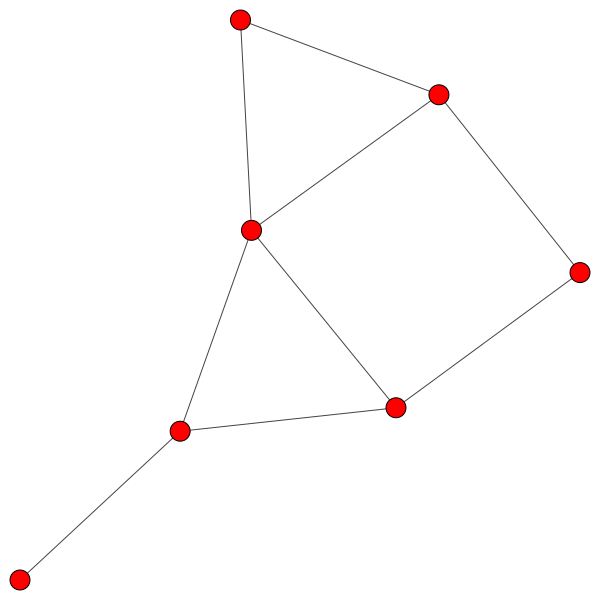

In [238]:
plot(g, layout = layout)

In [242]:
g.vs["label"] = g.vs["name"]

In [243]:
color_dict = {"m": "blue", "f": "pink"}

In [244]:
g.vs["color"] = [color_dict[gender] for gender in g.vs["gender"]]

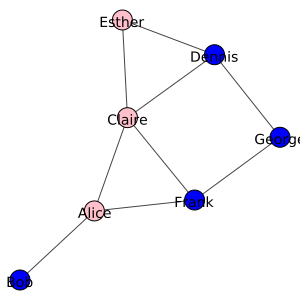

In [245]:
plot(g, layout = layout, bbox = (300, 300), margin = 20)